## Gathering Data

In [1]:
import requests 
import csv
import pandas as pd
import tweepy 
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr

In [2]:
get_file=requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
assert(get_file.status_code==200) #200 Status code confirms  connection succesfully established


In [143]:
with open('image_predictions.tsv', 'w') as f:      
    writer = csv.writer(f)
    reader = csv.reader(get_file.text.splitlines(), delimiter='\t') 
    #File is Tsv Seperated Changed the file To csv through delimiter
    for row in reader:
        writer.writerow(row)

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [2]:
TwitterArchive=pd.read_csv('twitter-archive-enhanced.csv')
TweetIds=TwitterArchive['tweet_id']

In [ ]:
with open("tweet_json.txt","a+") as File:
    for Tweets in TweetIds:
        try:
            twee=api.get_status(Tweets, tweet_mode='extended')
            File.write(json.dumps({"Tweet_id":int(Tweets),"Retweet_count":twee.retweet_count,
                                   "Like_Count":twee.favorite_count,"Language":twee.lang})+"\n") 
            #Wrote the File from Twitter API
        except:
            
            print(Tweets,"not Found") #Id missing

888202515573088257 not Found
873697596434513921 not Found
869988702071779329 not Found
866816280283807744 not Found
861769973181624320 not Found
845459076796616705 not Found
842892208864923648 not Found
837012587749474308 not Found
827228250799742977 not Found
802247111496568832 not Found
775096608509886464 not Found
Rate limit reached. Sleeping for: 728
Rate limit reached. Sleeping for: 728


In [4]:
TweetLikes=pd.read_json('tweet_json.txt',lines=True)
TwitterArchive=pd.read_csv('twitter-archive-enhanced.csv')
TwitterImage=pd.read_csv('image_predictions.tsv')

In [5]:
Archive=TwitterArchive.copy()
Image=TwitterImage.copy()
Likes=TweetLikes.copy()

## Assessing

In [6]:
Archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
Archive['source'].value_counts() #Repetation

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
Archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [11]:
Image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
Image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
Image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
Likes.head(5)

,Language,Like_Count,Retweet_count,Tweet_id
0,en,39018,8659,892420643555336193
1,en,33401,6358,892177421306343426
2,en,25188,4224,891815181378084864
3,en,42369,8769,891689557279858688
4,en,40519,9538,891327558926688256


In [15]:
Likes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 4 columns):
Language         2345 non-null object
Like_Count       2345 non-null int64
Retweet_count    2345 non-null int64
Tweet_id         2345 non-null int64
dtypes: int64(3), object(1)
memory usage: 91.6+ KB


In [16]:
Likes.describe()

,Like_Count,Retweet_count,Tweet_id
count,2345.000000,2345.000000,2.345000e+03
mean,8110.469083,3049.532196,7.422940e+17
std,12196.633197,5069.792109,6.833642e+16
min,0.000000,0.000000,6.660209e+17
25%,1408.000000,610.000000,6.783802e+17
50%,3558.000000,1424.000000,7.189392e+17
75%,10026.000000,3556.000000,7.986979e+17
max,144079.000000,77902.000000,8.924206e+17


In [ ]:
Rating=Archive.loc[Archive[x] > 0,['text',"numerator_rating"]]
Rating['debugged']=(Rating['text'].apply(lambda x: re.findall('[0-9]+\.[0-9]+',x)))
Rating['value_changed']=Filtered['debugged'].apply(lambda x: len(x)!=0)
YY=XX.loc[XX['value_changed']]

### Documenting

#### Dirty Data
* Archive Dataset
    * The Source Hyperlinks Provided Are redudant with only 4 unique value Span all over the rows which also is of no use
    * Removing Leading 0000 in Timestamp column and make Date Time Object
    * Fixing Numerator and Denominator (the 0's)
    * Dropping The Rows which are retweets
    * Irrevelant names in name column like a,an,o,infurating,all,officialy,old,very,mad,the
* Image Dataset
    * num Column should be Categorical (Finite). Helps in avoiding Implicit ordering
    * Captiliaze the breed names uniformly
    * Non descriptive Names p1,p2,p3
* Likes Dataset
    
    * Language should be Categorical

#### Messy Data
 
     * Values of the Variable makes a column in Archive Dataset
     * Combine the Likes Dataset with Archive Dataset
     * Redudant Tweet id in Datasets 

## Cleaning Data


In [38]:
Archive=Archive.drop('source',axis=1)

In [39]:
Archive['timestamp']=Archive['timestamp'].apply(lambda x: pd.to_datetime([x[:-6]])) 
#

In [40]:
Archive['timestamp'][1]

DatetimeIndex(['2017-08-01 00:17:27'], dtype='datetime64[ns]', freq=None)

In [41]:
Index=Archive.loc[((Archive['rating_numerator']==0 )| (Archive['rating_denominator']==0))].index
Archive=Archive.drop(Index,axis=0)

In [42]:
Indexing=Archive[(Archive['text'].apply(lambda x: x[0:2]=="RT"))].index
Archive.drop(Indexing,axis=0,inplace=True)

In [56]:
Names=pd.Series(["Solve","None","Names","a","an","o","actually","my","all","officially","old","very","mad","the"])
Filtered=Archive['name'].isin(Names) #Isin comapres the element of the List
Indexing=Archive[Filtered].index
Archive=Archive.drop(Indexing) #Drop the indexing

In [59]:
Archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,"DatetimeIndex(['2017-08-01 16:23:56'], dtype='...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,"DatetimeIndex(['2017-08-01 00:17:27'], dtype='...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,"DatetimeIndex(['2017-07-31 00:18:03'], dtype='...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


--------------

In [60]:
Image['img_num']=Image['img_num'].astype("category")

In [63]:
Image['p1']=Image['p1'].apply(lambda x:x.capitalize())
Image['p2']=Image['p2'].apply(lambda x:x.capitalize())
Image['p3']=Image['p3'].apply(lambda x:x.capitalize())

In [66]:
Image=Image.rename(columns={'p1':'Most_Likely_Prediction-p1',
                      'p2':'Second_Likely_Prediction-p2',
                      'p3':'Third_Likely_Prediction-p3'})

In [67]:
Image.head(3)

,tweet_id,jpg_url,img_num,Most_Likely_Prediction-p1,p1_conf,p1_dog,Second_Likely_Prediction-p2,p2_conf,p2_dog,Third_Likely_Prediction-p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


-----------------------------

In [71]:
Likes['Language']=Likes['Language'].astype("category")

In [72]:
Likes.head(4)

,Language,Like_Count,Retweet_count,Tweet_id
0,en,39018,8659,892420643555336193
1,en,33401,6358,892177421306343426
2,en,25188,4224,891815181378084864
3,en,42369,8769,891689557279858688


In [73]:
Likes['Language'].value_counts()

en     2327
und       7
nl        3
in        3
tl        1
ro        1
eu        1
et        1
es        1
Name: Language, dtype: int64

--------------------------------------------------------------

In [86]:
Archive_1=Archive.copy()
Image_1=Image.copy()
Likes_1=Likes.copy()

In [87]:
Archive_1['NA']=0
Archive_1.loc[((Archive_1['doggo']=="None") & (Archive_1['pupper']=='None' )& 
               (Archive_1['puppo']=="None") & (Archive_1['floofer']=="None")),"NA"]=1


#Since the no of tweets for which the stage is not known a seperate not availabile (NA) String 
# is for those for which Stage is not avaialbile

In [88]:

Archive_1['floofer']=Archive_1['floofer'].map({'floofer':1,"None":0})
Archive_1['doggo']=Archive_1['doggo'].map({'doggo':1,"None":0})
Archive_1['pupper']=Archive_1['pupper'].map({'pupper':1,"None":0})
Archive_1['puppo']=Archive_1['puppo'].map({'puppo':1,"None":0})



In [89]:
print(Archive_1['floofer'].value_counts())
print(Archive_1['doggo'].value_counts())
print(Archive_1['pupper'].value_counts())
print(Archive_1['puppo'].value_counts())
print(Archive_1['NA'].value_counts())

0    1410
1       5
Name: floofer, dtype: int64
0    1370
1      45
Name: doggo, dtype: int64
0    1287
1     128
Name: pupper, dtype: int64
0    1399
1      16
Name: puppo, dtype: int64
1    1226
0     189
Name: NA, dtype: int64


In [94]:
Cols=Archive_1.columns[:-5]
Archive_1=pd.melt(Archive_1,Cols)
Archive_1['value'].value_counts() #Gather the column values into a single column

0    5655
1    1420
Name: value, dtype: int64

In [102]:
Archive_1=Archive_1.loc[Archive_1['value']!=0] #Dropped the Value for which value is not 1
                                                # since these rows are duplicated due to melt function
Archive_1=Archive_1.drop('value',axis=1)
Archive_1.rename(columns={'variable':'stages'})

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stages
7,890240255349198849,NaN,NaN,"DatetimeIndex(['2017-07-26 15:59:51'], dtype='...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
30,884162670584377345,NaN,NaN,"DatetimeIndex(['2017-07-09 21:29:42'], dtype='...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
72,871515927908634625,NaN,NaN,"DatetimeIndex(['2017-06-04 23:56:03'], dtype='...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
80,869596645499047938,NaN,NaN,"DatetimeIndex(['2017-05-30 16:49:31'], dtype='...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo
145,846514051647705089,NaN,NaN,"DatetimeIndex(['2017-03-28 00:07:32'], dtype='...",This is Barney. He's an elder doggo. Hitches a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo
148,845397057150107648,NaN,NaN,"DatetimeIndex(['2017-03-24 22:08:59'], dtype='...",Say hello to Mimosa. She's an emotional suppor...,NaN,NaN,NaN,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,doggo
179,836753516572119041,NaN,NaN,"DatetimeIndex(['2017-03-01 01:42:39'], dtype='...",This is Meera. She just heard about taxes and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836753516...,12,10,Meera,doggo
197,832998151111966721,NaN,NaN,"DatetimeIndex(['2017-02-18 17:00:10'], dtype='...",This is Rhino. He arrived at a shelter with an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832998151...,13,10,Rhino,doggo
203,832273440279240704,NaN,NaN,"DatetimeIndex(['2017-02-16 17:00:25'], dtype='...",Say hello to Smiley. He's a blind therapy dogg...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832273440...,14,10,Smiley,doggo
204,832032802820481025,NaN,NaN,"DatetimeIndex(['2017-02-16 01:04:13'], dtype='...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo


In [103]:
Archive_1=Archive_1.rename(columns={'variable':'stages'})

In [105]:
Combined_1=pd.merge(Archive_1,Likes_1,left_on="tweet_id",right_on="Tweet_id",how="inner")
Combined_1.drop('Tweet_id',axis=1,inplace=True)

In [107]:
Index_Common=Image_1['tweet_id'].isin(Combined_1['tweet_id'])

In [112]:
Image_Combined=Image_1[Index_Common]

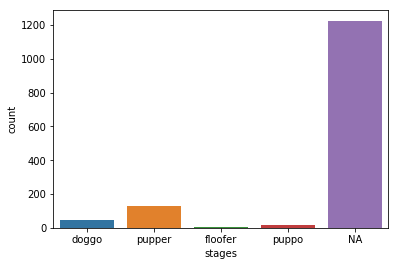

In [117]:
sns.countplot(x='stages',data=Combined_1)

** Lot of the Stages of the Dog were missing from the Charactestics , leading to lot of Not Avaiable Value which is more than 6 times the second **

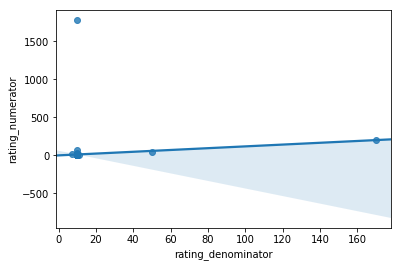

In [119]:
sns.regplot('rating_denominator','rating_numerator',data=Combined_1)

### Reg plot shows the vast difference between the scores and outliers where the main clusters is around 18 on x axis

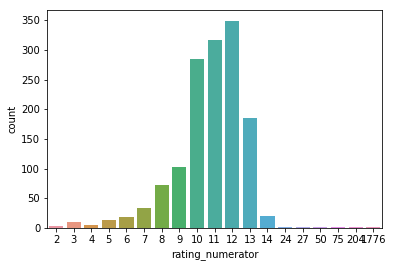

In [130]:
sns.countplot('rating_numerator',data=Combined_1)

### Most of the Rating is 11 or 12 and resemble more like a negatively skewed plot and there are few Outliers which are highly suspicious like 776 or 204 which might be due to human error

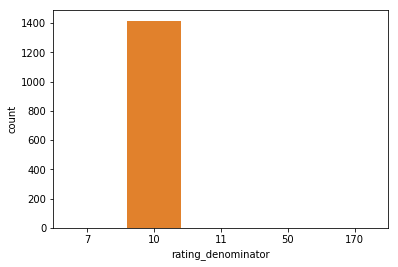

In [137]:
sns.countplot('rating_denominator',data=Combined_1)

(0, 3)

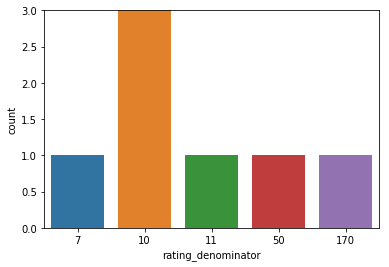

In [138]:
sns.countplot('rating_denominator',data=Combined_1)
plt.ylim(0,3)

### Almost all of the review is done on 10 scale except for a single cases which could be either error or may be related to context of tweet

In [141]:
#twitter_archive_master.csv
Combined_1.to_csv('twitter_archive_master.csv',index=False)

In [142]:
Image_Combined.to_csv('predciction_breed_dog.csv',index=False)

(0, 40000)

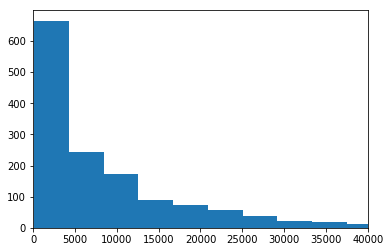

In [25]:
plt.hist(Combined['Like_Count'],bins=30)
plt.xlim(0,40000)


(0, 20000)

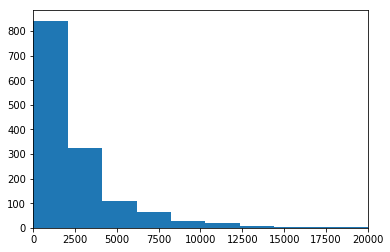

In [30]:
plt.hist(Combined['Retweet_count'],bins=30)
plt.xlim(0,20000)


### Retweet and  Like looks like strongly correlated. Like is always done more than retweet as evident from the plot . Both are positively skewed and gradually comes down from the tip

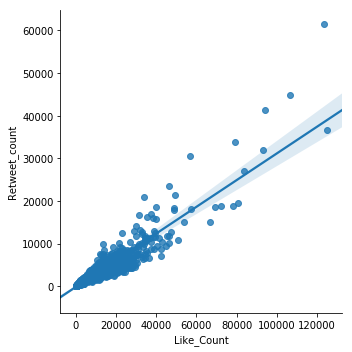

In [3]:
sns.lmplot(x="Like_Count",y="Retweet_count",data=Combined)

### They are definately strongly correlated given by the scatterplot where bulk of values closely following the regressional line

In [31]:
pearsonr(Combined['Retweet_count'],Combined['Like_Count'])



(0.92745267850492508, 0.0)

### Pearson r shows the high 92 percent correlation confirming our Hypothesis